In [11]:
%store -r FLIP
%store -r FLIPTEST

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.api as smg
import pickle
import numpy.polynomial.polynomial as npl
prtest = np.array(pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/porous_rock_images_test.pkl', 'rb')))
ftest = np.array(pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/flux_test.pkl', 'rb')))
ft = np.array(pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/flux_train.pkl', 'rb')))
prt = np.array(pickle.load(open('/Users/harrylinehan-hill/Documents/Programming/porous_rock_images_train.pkl', 'rb')))
ntest, ytest, xtest = prtest.shape
nt=ntest
yt=ytest
xt=xtest
n, y, x = prt.shape

In [6]:
# normalised mean square error - normalise, then mean square error s = simulated, o = observed
def nmse(s, o):
    s = np.array(s)
    o = np.array(o)
    mean = o.mean()
    std = o.std()
    onorm = (o - mean)/std
    snorm = (s - mean)/std
    return np.dot(onorm-snorm,onorm-snorm)

# r squared
def rsq(s, o):
    s = np.array(s)
    o = np.array(o)
    mean = o.mean()
    ssres = np.dot(s - o, s - o)
    sstot = np.dot(o-mean,o-mean)
    return 1 - ssres/sstot


In [45]:
# Bespoke sum 1 taking out [1,1.414] points
import numpy.polynomial.polynomial as npl
i = FLIP.shape[0]
print(i)
Pers2_diff_sum_1 = np.zeros(i)
for j in range(i): 
    C = FLIP[j,:,:]
    CH = C[np.where( all((C[:,2]== 1,  C[:,1] > 1.5, C[:,0] > 0)))]
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    Pers2_diff_sum_1[j] = diff_sumC

#test
itest = FLIPTEST.shape[0]
Pers2_diff_sum_1test = np.zeros(itest)
for j in range(itest): 
    C = FLIPTEST[j,:,:]
    CH = C[np.where( all((C[:,2]== 1 and C[:,1] > 1.5 and C[:,0] > 0)))] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    Pers2_diff_sum_1test[j] = diff_sumC



_ = plt.scatter(Pers2_diff_sum_1,ft, marker='x',color='forestgreen')
_ = plt.title('Bespoke sum 1 vs flux - H_0 - msr')
_ = plt.xlabel('Bespoke sum 1')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(Pers2_diff_sum_1, ft, 1)
r = [min(Pers2_diff_sum_1),max(Pers2_diff_sum_1)]
_ = plt.plot([min(Pers2_diff_sum_1),max(Pers2_diff_sum_1)], np.array(m) * r + c, 'r')
plt.show()

1000


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [22]:
from sklearn.linear_model import LinearRegression as LR
ytest = LR().fit(Pers2_diff_sum_1.reshape(-1,1),np.array(ft)).predict(Pers2_diff_sum_1test.reshape(-1,1))
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

nmse =  144.19885678335845
rsq =  0.2790057160832077


In [16]:
# add MEAN
MEAN = np.sum(np.sum(prt, axis=-1), axis=-1)
MEANTEST = np.sum(np.sum(prtest, axis=-1), axis=-1)

In [23]:
pers1diff_sum_1_L2_addmsr = np.array([Pers2_diff_sum_1,MEAN]).T
pers1diff_sum_1_L2_addmsrtest = np.array([Pers2_diff_sum_1test,MEANTEST]).T
ytest = LR().fit(pers1diff_sum_1_L2_addmsr,np.array(ft)).predict(pers1diff_sum_1_L2_addmsrtest)
print('results on the training set linear regression, bespoke sum 1 plus MEAN, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

results on the training set linear regression, bespoke sum 1 plus MEAN, flip method
nmse =  24.846284529910076
rsq =  0.8757685773504497


1000


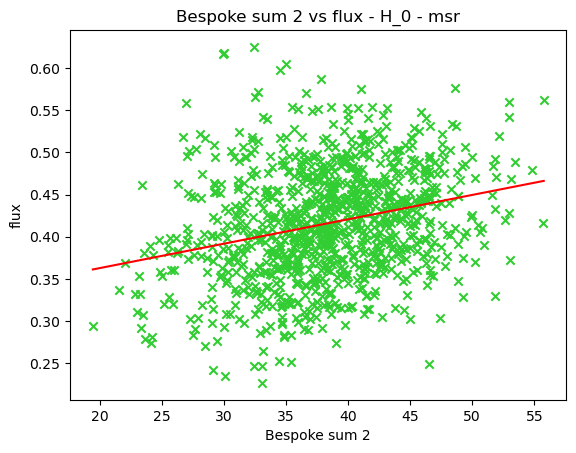

nmse =  192.9393641415353
rsq =  0.03530317929232352
results on the training set linear regression, bespoke sum 2 plus MEAN, flip method
nmse =  25.861197967832286
rsq =  0.8706940101608386


In [26]:
# Bespoke sum 2 
i = FLIP.shape[0]
print(i)
Pers2_diff_sum_1 = np.zeros(i)
for j in range(i): 
    C = FLIP[j,:,:]
    CH = C[np.where( C[:,2]== 1, C[:,1] > 2.3, C[:,0] > 0)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    Pers2_diff_sum_1[j] = diff_sumC

#test
itest = FLIPTEST.shape[0]
Pers2_diff_sum_1test = np.zeros(itest)
for j in range(itest): 
    C = FLIPTEST[j,:,:]
    CH = C[np.where( C[:,2]== 1, C[:,1] > 2.3, C[:,0] > 0)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    Pers2_diff_sum_1test[j] = diff_sumC



_ = plt.scatter(Pers2_diff_sum_1,ft, marker='x',color='limegreen')
_ = plt.title('Bespoke sum 2 vs flux - H_0 - msr')
_ = plt.xlabel('Bespoke sum 2')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(Pers2_diff_sum_1, ft, 1)
r = [min(Pers2_diff_sum_1),max(Pers2_diff_sum_1)]
_ = plt.plot([min(Pers2_diff_sum_1),max(Pers2_diff_sum_1)], np.array(m) * r + c, 'r')
plt.show()


from sklearn.linear_model import LinearRegression as LR
ytest = LR().fit(Pers2_diff_sum_1.reshape(-1,1),np.array(ft)).predict(Pers2_diff_sum_1test.reshape(-1,1))
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))


pers1diff_sum_1_L2_addmsr = np.array([Pers2_diff_sum_1,MEAN]).T
pers1diff_sum_1_L2_addmsrtest = np.array([Pers2_diff_sum_1test,MEANTEST]).T
ytest = LR().fit(pers1diff_sum_1_L2_addmsr,np.array(ft)).predict(pers1diff_sum_1_L2_addmsrtest)
print('results on the training set linear regression, bespoke sum 2 plus MEAN, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

1000


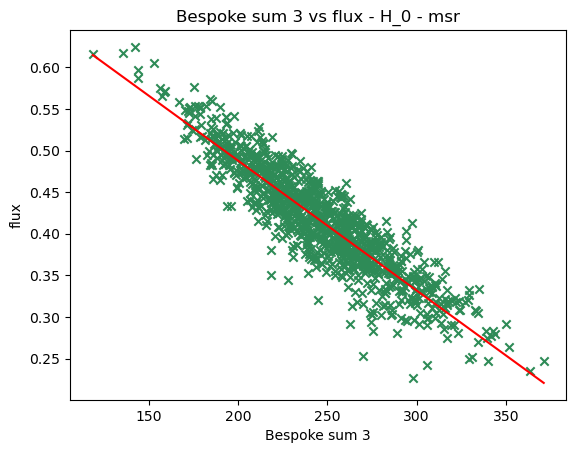

nmse =  29.53378210464713
rsq =  0.8523310894767643
results on the training set linear regression, bespoke sum 3 plus MEAN, flip method
nmse =  25.52383909205992
rsq =  0.8723808045397003


In [40]:
# Bespoke sum 3
i = FLIP.shape[0]
print(i)
Pers2_diff_sum_1 = np.zeros(i)
for j in range(i): 
    C = FLIP[j,:,:]
    CH = C[np.where( C[:,2]== 1, C[:,1] > 0, C[:,0] > 1)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    Pers2_diff_sum_1[j] = diff_sumC

#test
itest = FLIPTEST.shape[0]
Pers2_diff_sum_1test = np.zeros(itest)
for j in range(itest): 
    C = FLIPTEST[j,:,:]
    CH = C[np.where( C[:,2]== 1, C[:,1] > 0, C[:,0] > 1.1)] 
    diff_vectC = CH[:,1] - CH[:,0]
    diff_sumC = np.sum(diff_vectC)
    Pers2_diff_sum_1test[j] = diff_sumC



_ = plt.scatter(Pers2_diff_sum_1,ft, marker='x',color='seagreen')
_ = plt.title('Bespoke sum 3 vs flux - H_0 - msr')
_ = plt.xlabel('Bespoke sum 3')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(Pers2_diff_sum_1, ft, 1)
r = [min(Pers2_diff_sum_1),max(Pers2_diff_sum_1)]
_ = plt.plot([min(Pers2_diff_sum_1),max(Pers2_diff_sum_1)], np.array(m) * r + c, 'r')
plt.show()


from sklearn.linear_model import LinearRegression as LR
ytest = LR().fit(Pers2_diff_sum_1.reshape(-1,1),np.array(ft)).predict(Pers2_diff_sum_1test.reshape(-1,1))
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))


pers1diff_sum_1_L2_addmsr = np.array([Pers2_diff_sum_1,MEAN]).T
pers1diff_sum_1_L2_addmsrtest = np.array([Pers2_diff_sum_1test,MEANTEST]).T
ytest = LR().fit(pers1diff_sum_1_L2_addmsr,np.array(ft)).predict(pers1diff_sum_1_L2_addmsrtest)
print('results on the training set linear regression, bespoke sum 3 plus MEAN, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))

1000


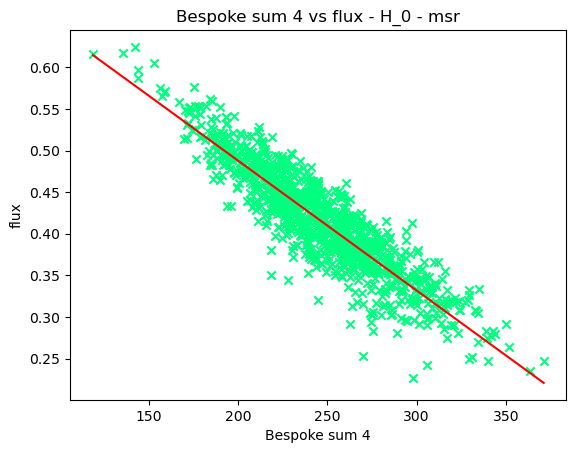

nmse =  29.53378210464713
rsq =  0.8523310894767643
results on the training set linear regression, bespoke sum 4 plus MEAN, flip method
nmse =  25.52383909205992
rsq =  0.8723808045397003


In [41]:
# Bespoke sum 4
i = FLIP.shape[0]
print(i)
Pers2_diff_sum_1 = np.zeros(i)
for j in range(i): 
    C = FLIP[j,:,:]
    CH = C[np.where( C[:,2]== 1, C[:,1] > 1, C[:,0] > 0)] 
    CHH = CH[np.where( CH[:,2]== 1, np.array((CH[:,0] > 1.5, CH[:,0] < 1.4, CH[:,1] > 2)).any() , CH[:,1] > 0)] 
    diff_vectC = CHH[:,1] - CHH[:,0]
    diff_sumC = np.sum(diff_vectC)
    Pers2_diff_sum_1[j] = diff_sumC

#test
itest = FLIPTEST.shape[0]
Pers2_diff_sum_1test = np.zeros(itest)
for j in range(itest): 
    C = FLIPTEST[j,:,:]
    CH = C[np.where( C[:,2]== 1, C[:,1] > 1, C[:,0] > 0)] 
    CHH = CH[np.where( CH[:,2]== 1, np.array((CH[:,0] > 1.5, CH[:,0] < 1.4, CH[:,1] > 2)).any() , CH[:,1] > 0)] 
    diff_vectC = CHH[:,1] - CHH[:,0]
    diff_sumC = np.sum(diff_vectC)
    Pers2_diff_sum_1test[j] = diff_sumC



_ = plt.scatter(Pers2_diff_sum_1,ft, marker='x',color='springgreen')
_ = plt.title('Bespoke sum 4 vs flux - H_0 - msr')
_ = plt.xlabel('Bespoke sum 4')
_ = plt.ylabel('flux')

#linear regression using polynomial fit
c, m  = npl.polyfit(Pers2_diff_sum_1, ft, 1)
r = [min(Pers2_diff_sum_1),max(Pers2_diff_sum_1)]
_ = plt.plot([min(Pers2_diff_sum_1),max(Pers2_diff_sum_1)], np.array(m) * r + c, 'r')
plt.show()


from sklearn.linear_model import LinearRegression as LR
ytest = LR().fit(Pers2_diff_sum_1.reshape(-1,1),np.array(ft)).predict(Pers2_diff_sum_1test.reshape(-1,1))
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))


pers1diff_sum_1_L2_addmsr = np.array([Pers2_diff_sum_1,MEAN]).T
pers1diff_sum_1_L2_addmsrtest = np.array([Pers2_diff_sum_1test,MEANTEST]).T
ytest = LR().fit(pers1diff_sum_1_L2_addmsr,np.array(ft)).predict(pers1diff_sum_1_L2_addmsrtest)
print('results on the training set linear regression, bespoke sum 4 plus MEAN, flip method')
print('nmse = ', nmse(ytest, ftest))
print('rsq = ', rsq(ytest,ftest))